# Assignment 2

**Submission deadline: last lab session before or on Friday 26.10.18**

**Points: 16 + 3 bonus points**


## Downloading this notebook

This assignment is an Colab/Jupyter notebook. Download it by cloning https://github.com/janchorowski/nn_assignments or open from Colab. Follow the instructions in its README for instructions. Whenever possible, add your solutions to the notebook.

Please email us about any problems with it - we will try to correct them quickly. Also, please do not hesitate to use GitHub’s pull requests to send us corrections!

# Problem 1 [2p] Bayes' Theorem

Bayes' theorem allows to reason about conditional probabilities of causes and their effects:

\begin{equation}
p(A,B)=p(A|B)p(B)=p(B|A)p(A)
\end{equation}

\begin{equation}
p(A|B) = \frac{p(B|A)p(A)}{p(B)}
\end{equation}

Bayes' theorem allows us to reason about probabilities of causes, when
we observe their results.  Instead of directly answering the hard
question $p(\text{cause}|\text{result})$ we can instead separately
work out the marginal probabilities of causes $p(\text{cause})$ and
carefully study their effects $p(\text{effect}|\text{cause})$.

Solve the following using Bayes' theorem.

1. **[1p]** There are two boxes on the table: box \#1 holds two
  black balls and eight red ones, box \#2 holds 5 black ones and
  5 red ones. We pick a box at random (with equal probabilities),
  and then a ball from that box.
  1. What is the probability, that the
  ball came from box \#1 if we happened to pick a red ball?
  
1. **[1p]** The government has started a preventive program of
  mandatory tests for the Ebola virus. Mass testing method is
  imprecise, yielding 1% of false positives (healthy, but the test
  indicates the virus) and 1% of false negatives (
  having the virus but healthy according to test results).
  As Ebola is rather infrequent, lets assume that it occurs in
  one in a million people in Europe.
  1. What is the probability,
  that a random European, who has been tested positive for Ebola
  virus, is indeed a carrier?
  2. Suppose we have an additional information, that the person has just
  arrived from a country where one in a thousand people is a carrier.
  How much will be the increase in probability?
  3. How accurate should be the test, for a 80% probability of true
  positive in a European?

In [30]:
# TODO Fill in the calculations instead of doing them by hand
# 1. p(box1|redball) = p(redball|box1)*p(box1)/p(redball) 
#    P               = P1             * P_box1 / P_redball
P1 = 8.0/10 #8 red balls from 10 balls
P_box1 = 1.0/2 # 1 box from 2 boxes
P_redball = (8.0+5)/(2+8+5+5) #13 redballs from 20 balls
P = P1 * P_box1 / P_redball
print 'Solution to task no:\n1 is ',P
# TODO Be precise and remember to add comments!
# 2.1 p(sick|positive) = p(positive|sick)*p(sick)/ p(positive)
p_sick = 1.0/1e6
p_positive_sick = 0.99
p_positive = p_positive_sick * p_sick + 0.01 * (1-p_sick)
P = p_positive_sick * p_sick / p_positive
print '2.1 is',P
# 2.2
p_sick = 1.0/1e3
p_positive_sick = 0.99
p_positive = p_positive_sick * p_sick + 0.01 * (1-p_sick)
P_new = p_positive_sick * p_sick / p_positive
print '2.2 new ppb is', P, 'increase p_new/p_old', P_new/P
# 2.3 0.8 = p(positive|sick)*p(sick)/ p(positive)
# p(sick) is given
# 0.8 = X * p(sick)/ ( X * p(sick) + (1-X) * (1-p_sick) )
# 0.8 = X * 1/1e6 / ((X/1e6) + (1 - 1/1e6 - X + X/1e6))
# and by solving with wolphram alpha we get that
# X = 4*999 999.0 / (4 * 999 998 + 5)
x = 4*999999.0 / (4 * 999998 + 5)
print '2.3 is',repr(x)

Solution to task no:
1 is  0.615384615385
2.1 is 9.89902989507e-05
2.2 new ppb is 9.89902989507e-05 increase p_new/p_old 910.836065574
2.3 is 0.9999997499998124


# Problem 2 [2p + 1b] Naive Bayes Classifier

The Bayes' theorem allows us to construct a classifier in which we
model how the data is generated. Here we will describe a
simple and popular example of such a classifier called the naive
Bayes classifier.  Despite its simplicity It is quite effective for
classification of text documents (e.g. as spam and non-spam).

Let a document be a sequence of words $D=W_1,W_2,\ldots,W_n$ 
We will model generation of text documents as a two-stage process.
First, document category $C_j$ is drawn at random with probability
$p(C_j)$, also called the *a priori* probability.
To define the class-conditional probability
$p(D|C_j)$, we will make a simplifying (naive)
assumption, that every word in the document is drawn independently at
random with probability $p(W_i|C)$:

\begin{equation*}
  p(D|C_j) = p(W_1,W_2,\ldots,W_n | C_j) \approx p(W_1|C_j)p(W_2|C_j)\ldots p(W_n|C_j).
\end{equation*}

To infer the class of a document we apply the Bayes theorem:
\begin{equation*}   p(C_j|D) = \frac{p(D|C_j)p(C_j)}{p(D)} = \frac{p(C_j)p(W_1|C_j)p(W_2|C_j)\ldots p(W_n|C_j)}{p(D)}.
\end{equation*}
Please note that since we assumed only a finite number of classes,
we can compute the term $p(D)$ by making sure that the *a
posteriori probabilities* $p(C_j|D)$ sum to $1$ over all classes.

In this exercise we will try to mimic the language-guessing feature
of [Google Translate](https://translate.google.com/), although
on a much smaller scale.  We are given an input which is a
lower-case sequence of characters (such as *"some people like
pineapple on their pizza"*), and we determine whether the
sequence's language is English, Polish or Spanish.
We will treat each character as a separate observation.
The numbers are taken from [Wikipedia article on letter frequency](https://en.wikipedia.org/wiki/Letter_frequency#Relative_frequencies_of_letters_in_other_languages). We display the first few rows:

In [17]:
import pandas as pd
from StringIO import StringIO

wiki_table = u"""English|French|German|Spanish|Portuguese|Esperanto|Italian|Turkish|Swedish|Polish|Dutch|Danish|Icelandic|Finnish|Czech\na|8.167|7.636|6.516|11.525|14.634|12.117|11.745|12.920|9.383|10.503|7.486|6.025|10.110|12.217|8.421\nb|1.492|0.901|1.886|2.215|1.043|0.980|0.927|2.844|1.535|1.740|1.584|2.000|1.043|0.281|0.822\nc|2.782|3.260|2.732|4.019|3.882|0.776|4.501|1.463|1.486|3.895|1.242|0.565|0|0.281|0.740\nd|4.253|3.669|5.076|5.010|4.992|3.044|3.736|5.206|4.702|3.725|5.933|5.858|1.575|1.043|3.475\ne|12.702|14.715|16.396|12.181|12.570|8.995|11.792|9.912|10.149|7.352|18.91|15.453|6.418|7.968|7.562\nf|2.228|1.066|1.656|0.692|1.023|1.037|1.153|0.461|2.027|0.143|0.805|2.406|3.013|0.194|0.084\ng|2.015|0.866|3.009|1.768|1.303|1.171|1.644|1.253|2.862|1.731|3.403|4.077|4.241|0.392|0.092\nh|6.094|0.737|4.577|0.703|0.781|0.384|0.636|1.212|2.090|1.015|2.380|1.621|1.871|1.851|1.356\ni|6.966|7.529|6.550|6.247|6.186|10.012|10.143|9.600|5.817|8.328|6.499|6.000|7.578|10.817|6.073\nj|0.153|0.613|0.268|0.493|0.397|3.501|0.011|0.034|0.614|1.836|1.46|0.730|1.144|2.042|1.433\nk|0.772|0.049|1.417|0.011|0.015|4.163|0.009|5.683|3.140|2.753|2.248|3.395|3.314|4.973|2.894\nl|4.025|5.456|3.437|4.967|2.779|6.104|6.510|5.922|5.275|2.564|3.568|5.229|4.532|5.761|3.802\nm|2.406|2.968|2.534|3.157|4.738|2.994|2.512|3.752|3.471|2.515|2.213|3.237|4.041|3.202|2.446\nn|6.749|7.095|9.776|6.712|4.446|7.955|6.883|7.987|8.542|6.237|10.032|7.240|7.711|8.826|6.468\no|7.507|5.796|2.594|8.683|9.735|8.779|9.832|2.976|4.482|6.667|6.063|4.636|2.166|5.614|6.695\np|1.929|2.521|0.670|2.510|2.523|2.755|3.056|0.886|1.839|2.445|1.57|1.756|0.789|1.842|1.906\nq|0.095|1.362|0.018|0.877|1.204|0|0.505|0|0.020|0|0.009|0.007|0|0.013|0.001\nr|5.987|6.693|7.003|6.871|6.530|5.914|6.367|7.722|8.431|5.243|6.411|8.956|8.581|2.872|4.799\ns|6.327|7.948|7.270|7.977|6.805|6.092|4.981|3.014|6.590|5.224|3.73|5.805|5.630|7.862|5.212\nt|9.056|7.244|6.154|4.632|4.336|5.276|5.623|3.314|7.691|2.475|6.79|6.862|4.953|8.750|5.727\nu|2.758|6.311|4.166|2.927|3.639|3.183|3.011|3.235|1.919|2.062|1.99|1.979|4.562|5.008|2.160\nv|0.978|1.838|0.846|1.138|1.575|1.904|2.097|0.959|2.415|0.012|2.85|2.332|2.437|2.250|5.344\nw|2.360|0.074|1.921|0.017|0.037|0|0.033|0|0.142|5.813|1.52|0.069|0|0.094|0.016\nx|0.150|0.427|0.034|0.215|0.253|0|0.003|0|0.159|0.004|0.036|0.028|0.046|0.031|0.027\ny|1.974|0.128|0.039|1.008|0.006|0|0.020|3.336|0.708|3.206|0.035|0.698|0.900|1.745|1.043\nz|0.074|0.326|1.134|0.467|0.470|0.494|1.181|1.500|0.070|4.852|1.39|0.034|0|0.051|1.503\nà|0|0.486|0|0|0.072|0|0.635|0|0|0|0|0|0|0|0\nâ|0|0.051|0|0|0.562|0|0|0|0|0|0|0|0|0|0\ná|0|0|0|0.502|0.118|0|0|0|0|0|0|0|1.799|0|0.867\nå|0|0|0|0|0|0|0|0|1.338|0|0|1.190|0|0.003|0\nä|0|0|0.578|0|0|0|0|0|1.797|0|0|0|0|3.577|0\nã|0|0|0|0|0.733|0|0|0|0|0|0|0|0|0|0\ną|0|0|0|0|0|0|0|0|0|0.699|0|0|0|0|0\næ|0|0|0|0|0|0|0|0|0|0|0|0.872|0.867|0|0\nœ|0|0.018|0|0|0|0|0|0|0|0|0|0|0|0|0\nç|0|0.085|0|0|0.530|0|0|1.156|0|0|0|0|0|0|0\nĉ|0|0|0|0|0|0.657|0|0|0|0|0|0|0|0|0\nć|0|0|0|0|0|0|0|0|0|0.743|0|0|0|0|0\nč|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0.462\nď|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0.015\nð|0|0|0|0|0|0|0|0|0|0|0|0|4.393|0|0\nè|0|0.271|0|0|0|0|0.263|0|0|0|0|0|0|0|0\né|0|1.504|0|0.433|0.337|0|0|0|0|0|0|0|0.647|0|0.633\nê|0|0.218|0|0|0.450|0|0|0|0|0|0|0|0|0|0\në|0|0.008|0|0|0|0|0|0|0|0|0|0|0|0|0\nę|0|0|0|0|0|0|0|0|0|1.035|0|0|0|0|0\ně|0|0|0|0|0|0|0|0|0|0|0|0|0|0|1.222\nĝ|0|0|0|0|0|0.691|0|0|0|0|0|0|0|0|0\nğ|0|0|0|0|0|0|0|1.125|0|0|0|0|0|0|0\nĥ|0|0|0|0|0|0.022|0|0|0|0|0|0|0|0|0\nî|0|0.045|0|0|0|0|0|0|0|0|0|0|0|0|0\nì|0|0|0|0|0|0|0.030|0|0|0|0|0|0|0|0\ní|0|0|0|0.725|0.132|0|0|0|0|0|0|0|1.570|0|1.643\nï|0|0.005|0|0|0|0|0|0|0|0|0|0|0|0|0\nı|0|0|0|0|0|0|0|5.114|0|0|0|0|0|0|0\nĵ|0|0|0|0|0|0.055|0|0|0|0|0|0|0|0|0\nł|0|0|0|0|0|0|0|0|0|2.109|0|0|0|0|0\nñ|0|0|0|0.311|0|0|0|0|0|0|0|0|0|0|0\nń|0|0|0|0|0|0|0|0|0|0.362|0|0|0|0|0\nň|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0.007\nò|0|0|0|0|0|0|0.002|0|0|0|0|0|0|0|0\nö|0|0|0.443|0|0|0|0|0.777|1.305|0|0|0|0.777|0.444|0\nô|0|0.023|0|0|0.635|0|0|0|0|0|0|0|0|0|0\nó|0|0|0|0.827|0.296|0|0|0|0|1.141|0|0|0.994|0|0.024\nõ|0|0|0|0|0.040|0|0|0|0|0|0|0|0|0|0\nø|0|0|0|0|0|0|0|0|0|0|0|0.939|0|0|0\nř|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0.380\nŝ|0|0|0|0|0|0.385|0|0|0|0|0|0|0|0|0\nş|0|0|0|0|0|0|0|1.780|0|0|0|0|0|0|0\nś|0|0|0|0|0|0|0|0|0|0.814|0|0|0|0|0\nš|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0.688\nß|0|0|0.307|0|0|0|0|0|0|0|0|0|0|0|0\nť|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0.006\nþ|0|0|0|0|0|0|0|0|0|0|0|0|1.455|0|0\nù|0|0.058|0|0|0|0|0.166|0|0|0|0|0|0|0|0\nú|0|0|0|0.168|0.207|0|0|0|0|0|0|0|0.613|0|0.045\nû|0|0.060|0|0|0|0|0|0|0|0|0|0|0|0|0\nŭ|0|0|0|0|0|0.520|0|0|0|0|0|0|0|0|0\nü|0|0|0.995|0.012|0.026|0|0|1.854|0|0|0|0|0|0|0\nů|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0.204\ný|0|0|0|0|0|0|0|0|0|0|0|0|0.228|0|0.995\nź|0|0|0|0|0|0|0|0|0|0.078|0|0|0|0|0\nż|0|0|0|0|0|0|0|0|0|0.706|0|0|0|0|0\nž|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0.721"""
df = pd.read_table(StringIO(wiki_table), sep='|', index_col=0)
df

,English,French,German,Spanish,Portuguese,Esperanto,Italian,Turkish,Swedish,Polish,Dutch,Danish,Icelandic,Finnish,Czech
a,8.167,7.636,6.516,11.525,14.634,12.117,11.745,12.920,9.383,10.503,7.486,6.025,10.110,12.217,8.421
b,1.492,0.901,1.886,2.215,1.043,0.980,0.927,2.844,1.535,1.740,1.584,2.000,1.043,0.281,0.822
c,2.782,3.260,2.732,4.019,3.882,0.776,4.501,1.463,1.486,3.895,1.242,0.565,0.000,0.281,0.740
d,4.253,3.669,5.076,5.010,4.992,3.044,3.736,5.206,4.702,3.725,5.933,5.858,1.575,1.043,3.475
e,12.702,14.715,16.396,12.181,12.570,8.995,11.792,9.912,10.149,7.352,18.910,15.453,6.418,7.968,7.562
f,2.228,1.066,1.656,0.692,1.023,1.037,1.153,0.461,2.027,0.143,0.805,2.406,3.013,0.194,0.084
g,2.015,0.866,3.009,1.768,1.303,1.171,1.644,1.253,2.862,1.731,3.403,4.077,4.241,0.392,0.092
h,6.094,0.737,4.577,0.703,0.781,0.384,0.636,1.212,2.090,1.015,2.380,1.621,1.871,1.851,1.356
i,6.966,7.529,6.550,6.247,6.186,10.012,10.143,9.600,5.817,8.328,6.499,6.000,7.578,10.817,6.073
j,0.153,0.613,0.268,0.493,0.397,3.501,0.011,0.034,0.614,1.836,1.460,0.730,1.144,2.042,1.433


Implement the language classifier and answer the following:

1. **[0.5p]** Naive Bayes can be implemented
    either by multiplying probabilities or by adding
    log-probabilities. Which one is better and why?
2. **[1.5p]** What is the language of the following phrases, according to the classifier (below in a code cell)? Assume equal prior language probabilities $P(C)$.
3. **[0-1 bonus]** What happens when a Naive Bayes classifier
      is applied to a document with out-of-vocabulary words? Propose
      some solutions. Relate them to the concept of Bayesian
      priors discussed during the lecture.

In [0]:
sentences = [
    u"No dejes para mañana lo que puedas hacer hoy.",
    u"Przed wyruszeniem w drogę należy zebrać drużynę.",
    u"Żeby zrozumieć rekurencję, należy najpierw zrozumieć rekurencję.",
    u"Si vale la pena hacerlo vale la pena hacerlo bien.",
    u"Experience is what you get when you didn't get what you wanted.",
    u"Należy prowokować intelekt, nie intelektualistów."]

In [25]:
# We can easily access the data.
import string
import numpy as np
langs = list(df)
letters = list(df.index)
print 'Languages:', ','.join(langs)
print 'Letters:', ', '.join(letters)
print u'P(ę|Polish) =', df.loc[u'ę'.encode('utf-8'), 'Polish']

# Normalize values to a probability distribution
df_norm = df.divide(df.values.sum(0) * len(langs))
print df_norm.values.sum(0)
print df_norm.loc['a'.encode('utf-8'), 'Polish']

def naive_bayes(sent, langs, df_norm):
    """Returns the most probable language of a sentence"""
    #print(df_norm.values.sum(0))
    result_pbties = []
    # TODO Fill in the rest of the code
    for i,lang in enumerate(langs):
        pb = np.log(df_norm.values.sum(0)[i])
        #pb = df_norm.values.sum(0)[i]
        for letter in sent:
            if letter.isspace() or letter in string.punctuation :
                continue
            pb += np.log(df_norm.loc[letter.lower().encode('utf-8'), lang])
            #pb *= df_norm.loc[letter.lower().encode('utf-8'), lang]
        result_pbties.append(pb)
    return langs[result_pbties.index(max(result_pbties))] 
    

for sent in sentences:
    print naive_bayes(sent, langs, df_norm), ':', sent

Languages: English,French,German,Spanish,Portuguese,Esperanto,Italian,Turkish,Swedish,Polish,Dutch,Danish,Icelandic,Finnish,Czech
Letters: a, b, c, d, e, f, g, h, i, j, k, l, m, n, o, p, q, r, s, t, u, v, w, x, y, z, à, â, á, å, ä, ã, ą, æ, œ, ç, ĉ, ć, č, ď, ð, è, é, ê, ë, ę, ě, ĝ, ğ, ĥ, î, ì, í, ï, ı, ĵ, ł, ñ, ń, ň, ò, ö, ô, ó, õ, ø, ř, ŝ, ş, ś, š, ß, ť, þ, ù, ú, û, ŭ, ü, ů, ý, ź, ż, ž
P(ę|Polish) = 1.035
[0.06666667 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667
 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667
 0.06666667 0.06666667 0.06666667]
0.007000109970308017
Spanish : No dejes para mañana lo que puedas hacer hoy.
Polish : Przed wyruszeniem w drogę należy zebrać drużynę.
Polish : Żeby zrozumieć rekurencję, należy najpierw zrozumieć rekurencję.
Italian : Si vale la pena hacerlo vale la pena hacerlo bien.
English : Experience is what you get when you didn't get what you wanted.
Polish : Należy prowokować intelekt, nie intelektualistów.


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log


In [26]:
x='N'
x.lower()


'n'

# Problem 3 [2p]
Given observations $x_1,\ldots,x_n$
  coming from a certain distribution,
  prove that MLE of a particular parameter of that distribution is equal to the sample mean $\frac{1}{n}\sum_{i=1}^n x_i$:
1. Bernoulli distribution with success probability $p$ and MLE $\hat{p}$,
2. Gaussian distribution $\mathcal{N}(\mu,\sigma)$ and MLE $\hat{\mu}$,
3. Poisson distribution $\mathit{Pois}(\lambda)$ and MLE $\hat{\lambda}$.

*NOTE: You can submit your solution on paper. To freeze the solution and spend late days, at minimum send a photo of your solution via e-mail.*

# Problem 4: Simple Kalman filtering [3p + 2b]

Oh no, someone has kidnapped you! You feel that you are in the trunk of a moving car. Luckily, you have your phone with GPS. Unfortunately, the GPS is noisy. You want to combine your estimate of your location by combining your prior belief about where you can be with the noisy GPS. You set out to implement a [1D Kalman filter](https://en.wikipedia.org/wiki/Kalman_filter).

Problem setup:
- your prior belief about the location is a Gaussian with mean 0 and some initial standard deviation $\mathcal{N}(0, \sigma_i)$
- the car moves in a brownian motion - each time step, it changes location by a normally distributed random amound sampled from $\mathcal{N}(0, \sigma_m)$
- each time step, you get a GPS reading which is sampled around your true (and sadly unknown to you ) location from $\mathcal{N}(\text{true loc}, \sigma_g)$

You want to use the following algorithm to track your location:

1. Initially, the PDF of your location is $p(x) = \mathcal{N}(x; \mu_l=0, \sigma_l=\sigma_i)$
2. For each time step, you update your belief about your location:
    1. $p(x)$ is updated due to according to the car movement distribution
    2. you use the Bayes formula to incorporate the GPS readout:
       $$
      p(x|\text{GPS readout}) = \frac{p(\text{GPS readout}|x)p(x)}
                                                           {p(\text{GPS readout})}
      $$
    3. you set $p(x) \gets p(x|\text{GPS readout})$ to be your prior belief about your locatin used during the next iteration.


NB: the GPS is actually very noisy, and Kalman filters are routinely used to fuse information from the GPS, accelerometers and odometry in practical applications, such as GPS navigation.

#### Problem [1p]

What is thePDF of
$$
p(x) = \mathcal{N}(x;\mu_1, \sigma_1)\mathcal{N}(x;\mu_2, \sigma_2)
$$

Hint: what disrtibution will the PDF belong to? Maybe you can simply compute the new mean and standard deviation?

#### Problem [.5p]

Implement below a simulator for your kidnapping, then fill in the code for plotting the true location and GPS readouts over time.

#### Problem [1.5p]

Implement a 1D Kalman filer using the algorithm stated above: maintian a probability distribution over your location, then at each timestep update it to account for car movement and GPS readouts.

Plot the estimated location along with its standard deviation against the true location from the simluator.

Experiemt with different setting for the standard deviations of the car's motion and the GPS. What happens if the simulator and the Kalman filter use different probability distributions?

#### Problem [2p bonus]

Suppose the car has a velocity, which is updated at each time step:
$$
\begin{split}
v &\gets v + \mathcal{N}(0, \sigma_v) \\
x &\gets x + v \\
\text{GPS readout} &= \mathcal{N}(x, \sigma_g) 
\end{split}
$$

Update the Kalman filter code to track both the car's location and velocity. You cna assume that the initial velocity is 0.

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns

sns.set_style('whitegrid')

from scipy.stats import norm

In [0]:
def simulate(initial_sigma, motion_sigma, gps_sigma, n_steps):
    # This is the true (unknonw) location
    x = norm.rvs(0, initial_sigma)
    loc_hist = []
    for s in range(n_steps):
        x += norm.rvs(0, motion_sigma)
        gps_readout = norm.rvs(x, gps_sigma)
        loc_hist.append((x, gps_readout))
    loc_df = pd.DataFrame(loc_hist, columns=['x', 'gps'])
    return loc_df


def kalman_predict(loc_df, initial_sigma, motion_sigma, gps_sigma):
    prior_mu = 0.0
    prior_sigma = float(initial_sigma)
    predictions = []
    p_x = norm.rvs(0,initial_sigma)
    for gps_readout in loc_df.gps:
        # expand the prior by the movement 
        #
        # TODO: fill in
        #
        
        #print(prior_sigma)
        # now do the bayes update
        #
        # TODO: fill in a simulation step
        #

    predictions_df = pd.DataFrame(predictions, columns=['mu', 'sigma'])
    return predictions_df

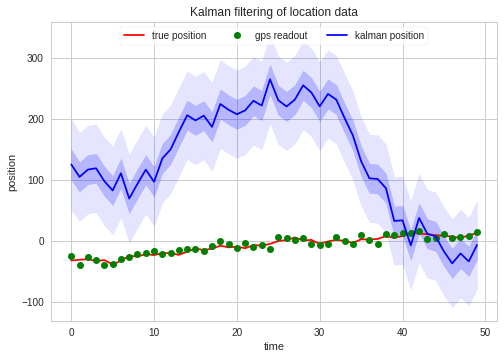

In [16]:
#@title Parametry symulacji
initial_sigma = 100 #@param
motion_sigma = 8 #@param
gps_sigma = 3 #@param
n_steps = 50 #@param

loc_df = simulate(initial_sigma, motion_sigma, gps_sigma, n_steps)
predictions_df = kalman_predict(loc_df, initial_sigma, motion_sigma, gps_sigma)
plt.plot(loc_df.x, 'r', label='true position')
plt.plot(loc_df.gps, 'go', label='gps readout')
plt.plot(predictions_df.mu, 'b', label='kalman position')
plt.fill_between(range(len(predictions_df)),
                 predictions_df.mu + predictions_df.sigma,
                 predictions_df.mu - predictions_df.sigma, color='b', alpha=0.2)
plt.fill_between(range(len(predictions_df)),
                 predictions_df.mu + 3 * predictions_df.sigma,
                 predictions_df.mu - 3 * predictions_df.sigma, color='b', alpha=0.1)
plt.legend(loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.0), frameon=True)
plt.xlabel('time')
plt.ylabel('position')
plt.title('Kalman filtering of location data')
None

# Problem 5 [2p]

1. Find simple expressions for the following functions' derivatives with respect to vector $\mathbf{x}$.
    1. $\tanh(\mathbf{x})$
    
    $\tanh(\mathbf{x})' = (\frac{sinh(x)}{cosh(x)})' = \frac{sinh(x)'cosh(x) - sinh(x)cosh(x)'}{cosh(x)^2} = \frac{cosh(x)^2 - sinh(x)^2}{cosh(x)^2} = 1 - \frac{sinh(x)^2}{cosh(x)^2} \\= 1 - tanh(x) ^2$
    
    2. $\sigma(\mathbf{x}) = \frac{1}{1 + e^{-\mathbf{x}}}$
     
    $\sigma(\mathbf{x})' = (\frac{1}{1 + e^{-\mathbf{x}}})' = \frac{-1}{(1+e^{-x})^2}(1+e^{-x})' = \frac{1}{1+e^{-x}}\frac{e^{-x}}{1+e^-{x}} = \sigma(x)\frac{1+e^{-x}-1}{1+e^-{x}} = \sigma(x)(1-\sigma(x))$
2. Find the following functions' gradients with respect to vector $[x, y, z]^T$:
    1. $f_1([x, y, z]^T) = x + y$
    
    $\nabla f = [f'_{x}, f'_y, f'_z] = [1,1,0]$
    2. $f_2([x, y, z]^T) = xy$
    
    $\nabla f = [y,x,0]$
    3. $f_3([x, y, z]^T) = x^2y^2$
    
    $\nabla f = [2xy^2,2x^2y,0]$
    4. $f_4([x, y, z]^T) = (x + y)^2$
    
    $\nabla f = [2x+2y,2x+2y,0]$
    5. $f_5([x, y, z]^T) = x^4 + x^2 y z + x y^2 z + z^4$
    
    $\nabla f = [4x^3+2xyz + y^2z,x^z+2xyz,x^2y+xy^2+4z^3]$
    6. $f_6([x, y, z]^T) = e^{x + 2y}$
    
    $\nabla f = [e^{x+2y},2e^{x+2y},0]$
    7. $f_7([x, y, z]^T) = \frac{1}{x y^2}$
    
    $\nabla f = [-y^2\frac{1}{x^2y^4},-2y\frac{1}{x^2y^4},0]$
    8. $f_8([x, y, z]^T) = ax + by + c$
    
    $\nabla f = [a,b,0]$
    9. $f_9([x, y, z]^T) = \tanh(ax + by + c)$
    
    $\nabla f = [a(1-tanh(ax+by+c)^2),b(1-tanh(ax+by+c)^2),0]$

# Problem 6 [2p]

Find the following functions' gradients or Jacobians with respect to vector $\mathbf{x}$, where $\mathbf{x}, \mathbf{b} \in \mathbb{R}^{n}$, $\mathbf{W} \in \mathbb{R}^{n \times n}$:

1. **[0.5p]** $\mathbf{W} \mathbf{x} + \mathbf{b}$



2. **[0.5p]** $\mathbf{x}^T \mathbf{W} \mathbf{x}$,


3. **[0.5p]** $\sigma(\mathbf{W} \mathbf{x} + \mathbf{b})$,
    with $\sigma$ applied element-wise. Hint: use the Hadamard product
    
4. **[0.5p]** $-\log(S(\mathbf{x})_j)$, where $S$ is the
    softmax function
    (https://en.wikipedia.org/wiki/Softmax_function) and we are
    interested in the derivative over the $j$-th output of the
    Softmax.

In [1]:
import numpy as np

np.dot(np.dot(vai.T,np.ones((100,100))),vai).shape

NameError: ignored

In [20]:
vai = np.ones(100)[:,np.newaxis]
vai.shape

(100, 1)

# Problem 7 [2p] Linear Regression

1. Implement a function generating a dataset of $n$ points
  according to the following algorithm:
  1. Draw $n$ points $x \propto U(0;10)$ (uniformly distributed on $[0,10]$).
  2. Draw $n$ points $y \propto \mathcal{N}(1+20x-1.3x^2, 7)$
    (from a Gaussian distribution with $\mu=1+20x-1.3x^2$ and $\sigma=7$).

  Prepare a dataset of 30 elements and make a scatterplot of
  the expected value $y$ in function $x$.

2. Use linear regression to fit polynomials to the
  generated dataset. Fit polynomials of degrees zero (a constant line),
  one, two and three. An easy way to do it is to transform each data
  point $x$ into a vector of its powers $[1, x, x^2, \ldots, x^m]$.

  Plot the dataset and all regression curves on one figure.

  **Note:** The name _linear regression_ signifies that the
  hypothesis is linear with respect to parameters $\Theta$.
  However, the relationship between $x$ and $y$ is not constrained
  to a linear one. In this exercise it is a polynomial one.

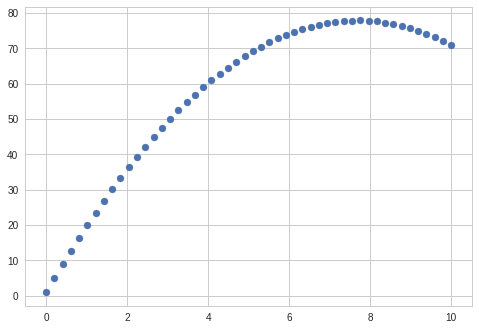

In [2]:
def make_dataset(N):
    X = np.random.uniform(0,10,N)
    
    Y = np.random.normal(1+20*X-1.3*X**2,7,N)
    return X,Y

data = make_dataset(30)
xaxis = np.linspace(0,10)
plt.scatter(xaxis,[1+20*x-1.3*x**2 for x in xaxis])
plt.show()

In [27]:
data


(array([8.80800025, 3.02164851, 8.10747718, 3.45382772, 7.33174247,
        5.68388623, 3.1455585 , 6.35800058, 6.72556834, 1.12397275,
        3.89548173, 7.01633747, 8.89358792, 5.39456874, 6.23658029,
        5.7063412 , 0.15861512, 7.81051832, 2.97135343, 5.93785694,
        1.02100266, 7.69506323, 8.19156675, 0.81249089, 2.32866868,
        4.84823527, 6.38306312, 2.28913819, 9.52338931, 4.25290302]),
 array([89.04916735, 45.52232806, 73.91998449, 55.08580379, 75.24563955,
        77.3693217 , 48.30971851, 84.27342757, 77.15412086, 15.36755528,
        52.42086076, 79.75711374, 78.50503044, 81.18188764, 70.95932404,
        68.15112745, 17.08956541, 56.12777512, 62.23909919, 88.0643815 ,
        22.42685745, 85.17188695, 69.98173673, 24.41826389, 44.6881989 ,
        61.28543766, 73.72167027, 38.38406192, 81.00332281, 68.57431387]))

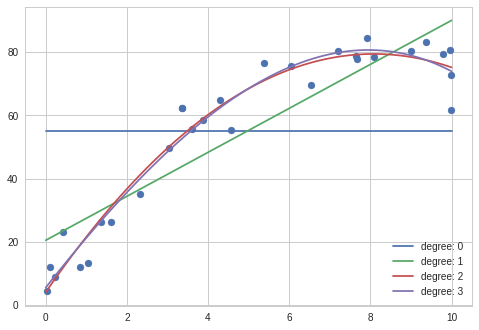

In [3]:
from numpy.linalg import inv

def powers_of_X(X, degree):
    powers = np.arange(degree + 1).reshape(-1,1)
    return X**powers

def compute_polynomial(X, Theta):
    XP = powers_of_X(X, len(Theta) - 1) # len(Theta) x N
    Y = np.dot(XP.T,Theta)
    #print(XP.shape,Y.shape,Theta.shape)
    return Y

plot_x_space = np.linspace(0,10,100)

plt.scatter(data[0], data[1])
for degree in range(4):
    X = powers_of_X(data[0], degree) # Matrix d x N
    Y = data[1].reshape(1, -1)       # Matrix 1 x N
    Theta = np.linalg.inv(X.dot(X.T)).dot(X).dot(Y.T)
    #print Theta
    #Theta2 = np.linalg.lstsq(np.dot(X,X.T),np.dot(X,Y.T))[0]
    #print Theta2
    plt.plot(plot_x_space, compute_polynomial(plot_x_space, Theta).ravel(), 
         label="degree: %d" %(degree, ))
    #print Theta, Theta.shape
plt.legend(loc='lower right')

# Problem 8 [1p]

When the data set is small and highly dimensional (or when high degree polynomials are used) the linear regression solution may fit the noise in the data instead of capturing the general rule. We call this phenomenon overfitting and will discuss it in detail in a few lectures.

One way of preventing overfitting is to force the model's parameters to be small. We call this *regularization*. Consider the following cost function:

$$ J(\Theta) = \sum_{i=1}^N (y^{(i)} - \Theta^T x^{(i)})^2 + \frac{\lambda}{2} \Theta^T \Theta $$

Analyze datasets sampled using the following procedure:

1. $x \propto U(0;1)$: $x$ is sampled uniformly from the  $0-1$ range.
2. $y \propto \mathcal{N}(\mu=1+2x-5x^2 + 4x^3, \sigma=0.1)$: then 
    $y$ is sampled from the Normal distribution with mean 
    $\mu=1+2x-5x^2+4x^3$ and standard deviation $0.1$

Repeat 30 times an experiment in which you sample a new training
dataset, then fit polynomials of degree 0 to 14 and use $\lambda$
value from the set $\{0, 10^{-6}, 10^{-5}, 10^{-4}, 10^{-3}, 10^{-2}, 10^{-1}\}$.

Plot the mean training and testing errors. What is the effect of increasing $\lambda$?

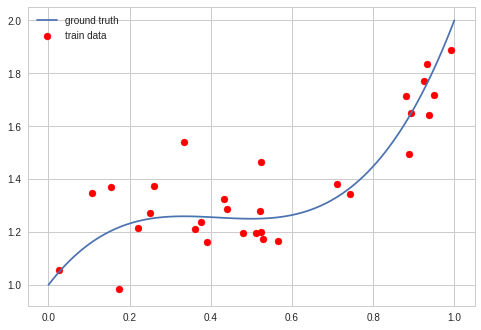

In [4]:
def poly_fun(X, Theta):
    """Compute the value of polynomial with coefficients Theta for points in X"""
    #
    # TODO: Write body of the function.
    # Return a vector of values in points from X (the same shape as X).
    # 
    return compute_polynomial(X, Theta)

#
# The true polynomial relation:
# y(x) = 1 + 2x -5x^2 + 4x^3
#
# TODO: write down the proper coefficients
#
true_poly = np.array([1., 2., -5, 4])

def make_dataset(N, theta=true_poly, sigma=0.1):
    """ Sample a dataset """
    X = np.random.rand(N)
    Y = np.random.randn(N)*sigma + poly_fun(X, true_poly)
    return X,Y


train_data = make_dataset(30)
XX = np.linspace(0,1,100)
YY = poly_fun(XX, true_poly)
plt.scatter(train_data[0], train_data[1], label='train data', color='r')
plt.plot(XX, poly_fun(XX, true_poly), label='ground truth')
plt.legend(loc='upper left')

In [0]:
import scipy as sc

In [0]:
#please note: lambda is a reserved keyword in python, thus we use _lambda
def poly_fit(data, degree, _lambda):
    "Fit a polynomial of a given degree and weight decay parameter C"
    powers = np.arange(degree + 1.0).reshape(-1,1)
    X = data[0].reshape(1,-1)
    Y = data[1].reshape(1,-1)
    XX = X**powers
    #
    # TODO: implement the closed-form solution for Theta
    #
    # Please note that np.inv may be numerically unstable.
    # It is better to use np.linalg.solve or even a QR decomposition.
    #np.linalg.inv(X.dot(X.T)).dot(X).dot(Y.T) / (2.0*_lambda)
    #Theta =  np.linalg.solve(np.dot(XX,XX.T)+_lambda,np.dot(XX,Y.T))
    #Theta =  np.linalg.lstsq(np.dot(XX,XX.T)+_lambda,np.dot(XX,Y.T),rcond=None)[0]
    
    x, residuals, rank, s = np.linalg.lstsq(np.dot(XX,XX.T)+np.identity(XX.shape[0])*_lambda,np.dot(XX,Y.T),rcond=None)
    
    #Theta = sc.linalg.lstsq(np.dot(XX,XX.T)+_lambda,np.dot(XX,Y.T))[0]
    #Theta = np.linalg.pinv(XX.dot(XX.T)+_lambda).dot(XX).dot(Y.T)
    XtX_lambda = XX.dot(XX.T) + np.identity(XX.shape[0]) * (_lambda/2)
    XtY = XX.dot(Y.T)
    #Theta = np.linalg.solve(XtX_lambda, np.identity(XX.shape[0])).dot(XtY)
    return x
    #print Theta.shape, np.dot(XX,Y.T).shape
    #print "zz", XX, Y.T
    #print Theta, "wilo", Theta2
    #return x

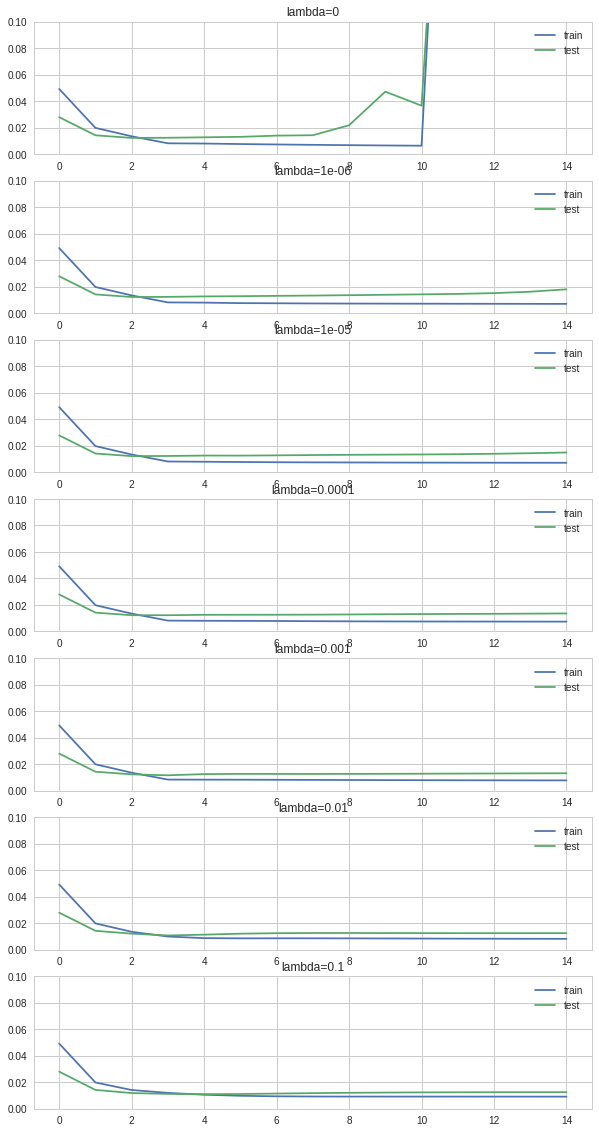

In [6]:
lambdas = [0.0, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1]
degrees  = np.arange(15)

num_repetitions = 30
num_samples = 30

train_errors = np.zeros((len(lambdas), len(degrees)))
test_errors = np.zeros((len(lambdas), len(degrees)))

#sample a single dataset for all experiments
test_data = make_dataset(num_samples)

Y_test = test_data[1].reshape(1, -1)    
for repetition in xrange(num_repetitions):
    #sample a new training dataset for this repetition
    train_data = make_dataset(num_samples)
    #plt.scatter(data[0], data[1])
    for degree_i, degree in enumerate(degrees):
        for lambda_i, _lambda in enumerate(lambdas):
            Theta = poly_fit(train_data, degree, _lambda)
            #print Theta, degree
            X_test = powers_of_X(test_data[0], degree) # Matrix d x N
            X = powers_of_X(train_data[0], degree) # Matrix d x N
            Y = train_data[1].reshape(1, -1)   
            #
            # TODO: compute the mean training and test errors
            #
            E = (np.dot(Theta.T,X) - Y)**2# + _lambda/2.0 * np.dot(Theta.T,Theta)  

            #print(k)
            train_errors[lambda_i, degree_i] += np.mean(E)
            #print degree
            E_test =  (np.dot(Theta.T,X_test) - Y_test)**2 #+ _lambda/2.0 * np.dot(Theta.T,Theta)
            test_errors[lambda_i, degree_i] += np.mean(E_test)
            #print(J,J_test)
train_errors /=  num_repetitions
test_errors /= num_repetitions

plt.figure(figsize=(10,20))
for lambda_i, _lambda in enumerate(lambdas):
    plt.subplot(len(lambdas), 1, lambda_i+1)
    plt.plot(degrees, train_errors[lambda_i,:], label='train')
    plt.plot(degrees, test_errors[lambda_i,:],  label='test')
    plt.ylim(0,0.1)
    plt.title('lambda=%g'%(_lambda,))
    plt.grid(True)
    plt.legend()

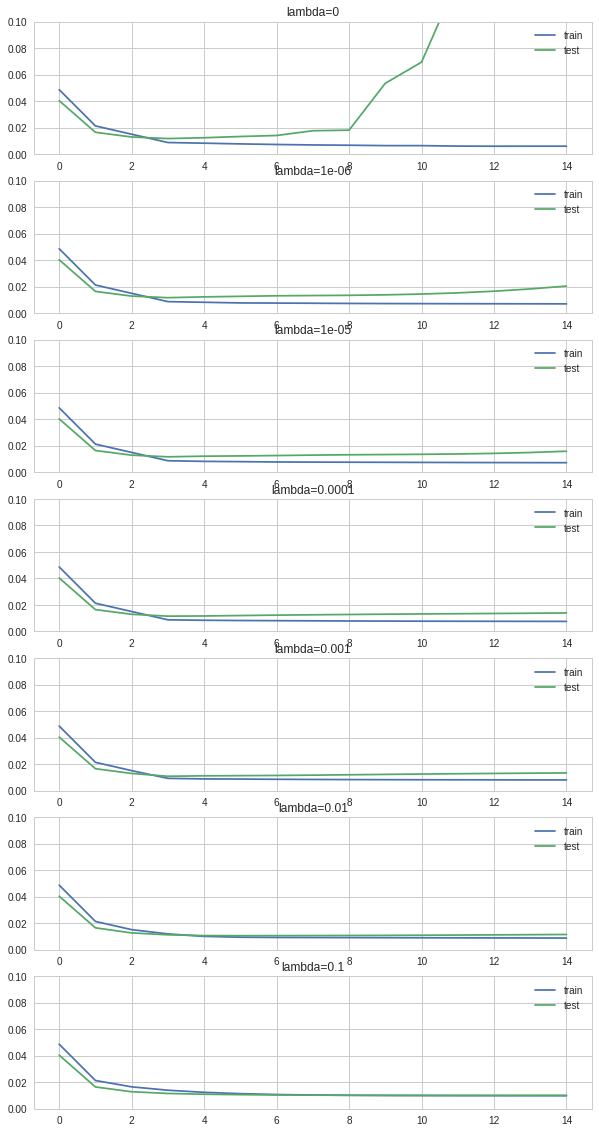

In [8]:
lambdas = [0.0, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1]
degrees  = np.arange(15)

num_repetitions = 30
num_samples = 30

train_errors = np.zeros((len(lambdas), len(degrees)))
test_errors = np.zeros((len(lambdas), len(degrees)))

#sample a single dataset for all experiments
test_data = make_dataset(num_samples)

Y_test = test_data[1].reshape(1, -1)    
for repetition in xrange(num_repetitions):
    #sample a new training dataset for this repetition
    train_data = make_dataset(num_samples)
    #plt.scatter(data[0], data[1])
    for degree_i, degree in enumerate(degrees):
        for lambda_i, _lambda in enumerate(lambdas):
            Theta = poly_fit(train_data, degree, _lambda)
            #print Theta, degree
            X_test = powers_of_X(test_data[0], degree) # Matrix d x N
            X = powers_of_X(train_data[0], degree) # Matrix d x N
            Y = train_data[1].reshape(1, -1)   
            #
            # TODO: compute the mean training and test errors
            #
            E = (np.dot(Theta.T,X) - Y)**2# + _lambda/2.0 * np.dot(Theta.T,Theta)  

            #print(k)
            train_errors[lambda_i, degree_i] += np.mean(E)
            #print degree
            E_test =  (np.dot(Theta.T,X_test) - Y_test)**2 #+ _lambda/2.0 * np.dot(Theta.T,Theta)
            test_errors[lambda_i, degree_i] += np.mean(E_test)
            #print(J,J_test)
train_errors /=  num_repetitions
test_errors /= num_repetitions

plt.figure(figsize=(10,20))
for lambda_i, _lambda in enumerate(lambdas):
    plt.subplot(len(lambdas), 1, lambda_i+1)
    plt.plot(degrees, train_errors[lambda_i,:], label='train')
    plt.plot(degrees, test_errors[lambda_i,:],  label='test')
    plt.ylim(0,0.1)
    plt.title('lambda=%g'%(_lambda,))
    plt.grid(True)
    plt.legend()

In [8]:
train_errors

array([[0.04921953, 0.01832356, 0.01280546, 0.00840683, 0.00804435,
        0.00779351, 0.00758437, 0.00726813, 0.0070186 , 0.00673844,
        0.00674872, 0.0065386 , 0.00647929, 0.00649064, 0.00641064],
       [0.04921953, 0.01832356, 0.01280546, 0.00840683, 0.00804435,
        0.00779351, 0.00758437, 0.00726813, 0.0070186 , 0.00673844,
        0.00674873, 0.00653859, 0.00648244, 0.00649498, 0.00641638],
       [0.04921953, 0.01832356, 0.01280546, 0.00840683, 0.00804435,
        0.00779351, 0.00758437, 0.00726813, 0.00701878, 0.00673865,
        0.00674878, 0.00653264, 0.00649205, 0.00650431, 0.00642531],
       [0.04921953, 0.01832356, 0.01280546, 0.00840683, 0.00804435,
        0.00779351, 0.0075844 , 0.00726839, 0.00702274, 0.00673961,
        0.00674917, 0.00653305, 0.00649601, 0.00650783, 0.00642873],
       [0.04921953, 0.01832357, 0.01280549, 0.00840694, 0.00804462,
        0.00779402, 0.00758591, 0.00727331, 0.00703247, 0.00674768,
        0.00675739, 0.00654009, 0.0065126 , 